# Priprava podatkov

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("dataset.xls")

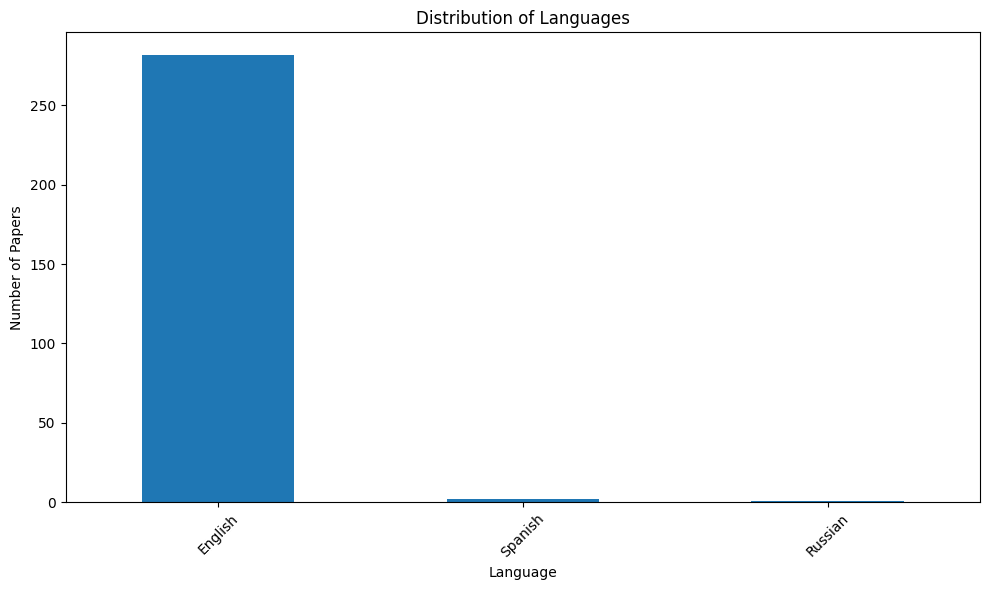

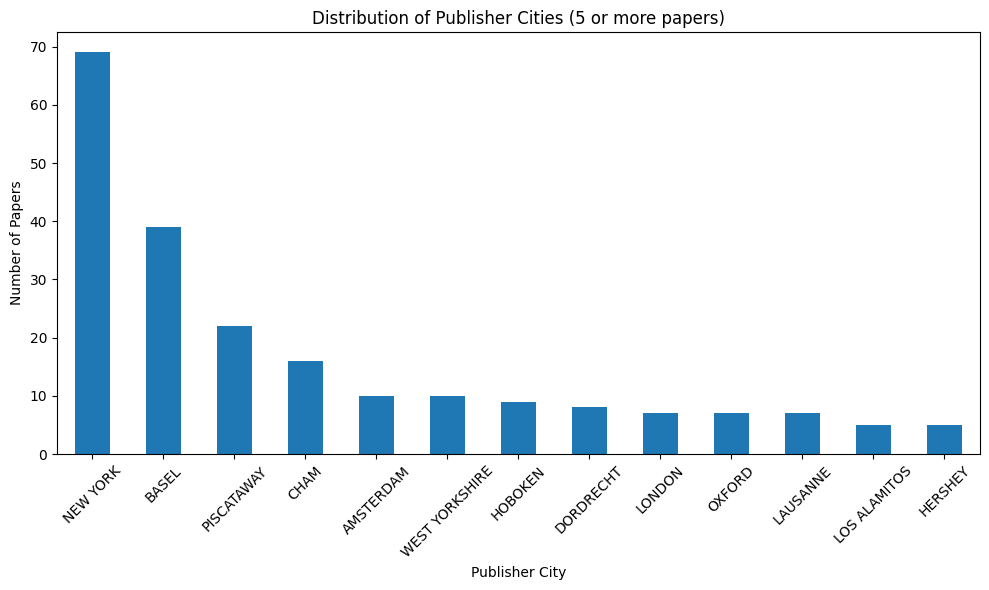

In [2]:
# Plotting the distribution of the 'language' column
language_counts = df['Language'].value_counts()
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar')
plt.title('Distribution of Languages')
plt.xlabel('Language')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the distribution of the 'Publisher City' column with cities having 5 or more occurrences
publisher_city_counts = df['Publisher City'].value_counts()

# Filter to include only cities with 5 or more occurrences
filtered_publisher_city_counts = publisher_city_counts[publisher_city_counts >= 5]

plt.figure(figsize=(10, 6))
filtered_publisher_city_counts.plot(kind='bar')
plt.title('Distribution of Publisher Cities (5 or more papers)')
plt.xlabel('Publisher City')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


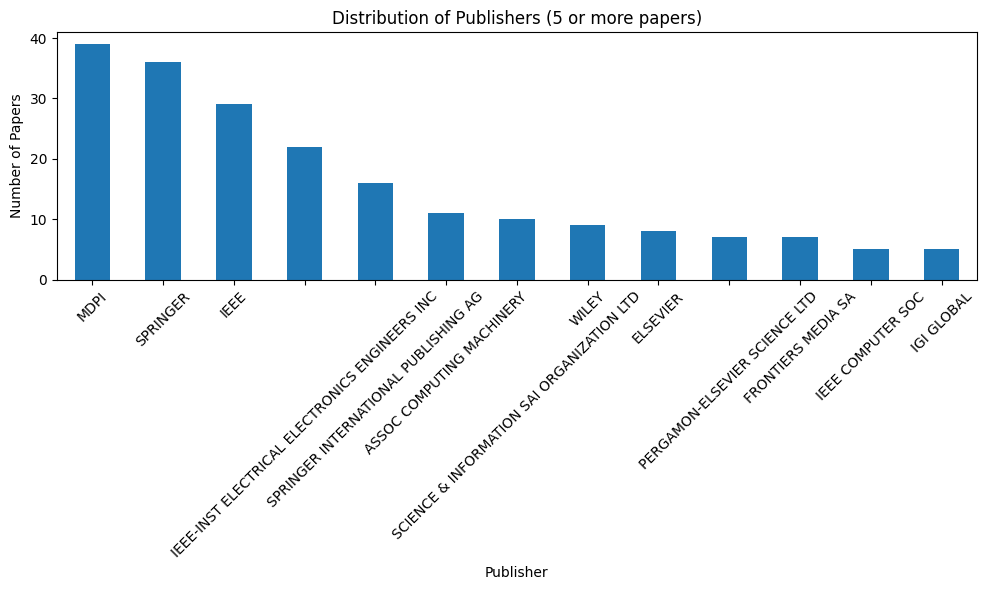

In [3]:
# Plotting the distribution of the 'Publisher' column with publishers having 5 or more occurrences
publisher_counts = df['Publisher'].value_counts()

# Filter to include only publishers with 5 or more occurrences
filtered_publisher_counts = publisher_counts[publisher_counts >= 5]

plt.figure(figsize=(10, 6))
filtered_publisher_counts.plot(kind='bar')
plt.title('Distribution of Publishers (5 or more papers)')
plt.xlabel('Publisher')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Topic 1:
performance, academic, students, learning, student, data, machine, educational, features, school
Topic 2:
learning, students, data, education, machine, student, study, performance, model, prediction
Topic 3:
students, learning, performance, academic, data, prediction, model, student, models, machine
Topic 4:
students, performance, educational, student, academic, data, learning, accuracy, prediction, model
Topic 5:
learning, students, academic, performance, data, student, machine, prediction, used, study


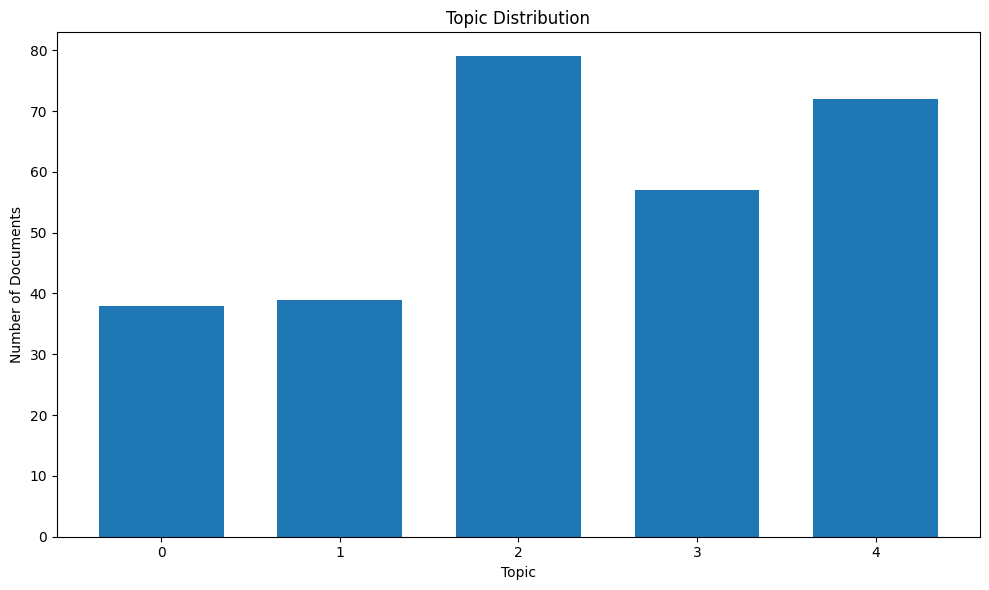

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Preprocess the 'Abstract' column: remove NaN, convert to lowercase, and strip whitespace
df['Abstract'] = df['Abstract'].dropna().str.lower().str.strip()

# Vectorization: Convert text to a document-term matrix
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
dtm = vectorizer.fit_transform(df['Abstract'])

# LDA Topic Modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words)

# Plotting the distribution of topics
topic_distribution = lda.transform(dtm)
topic_counts = topic_distribution.argmax(axis=1)
plt.figure(figsize=(10, 6))
plt.hist(topic_counts, bins=range(lda.n_components + 1), align='left', rwidth=0.7)
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.xticks(range(lda.n_components))
plt.tight_layout()
plt.show()


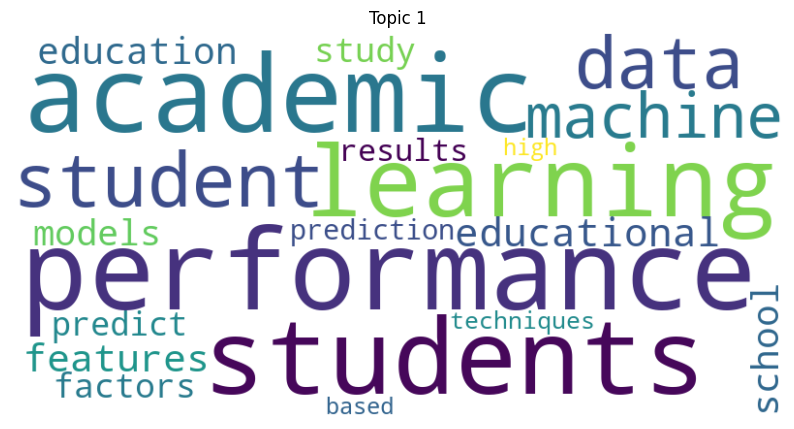

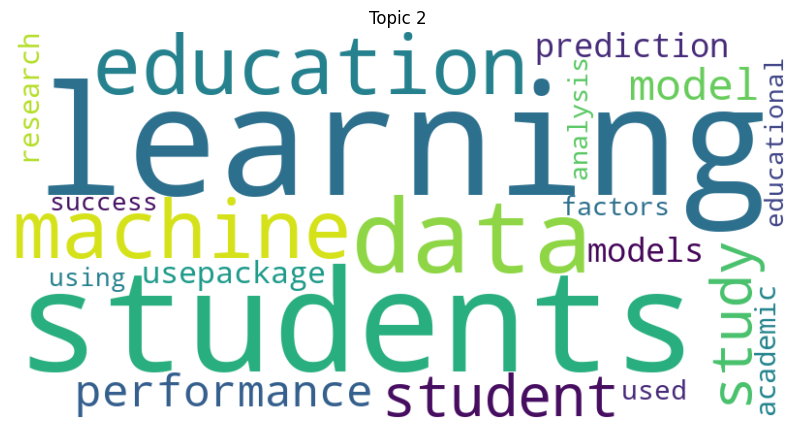

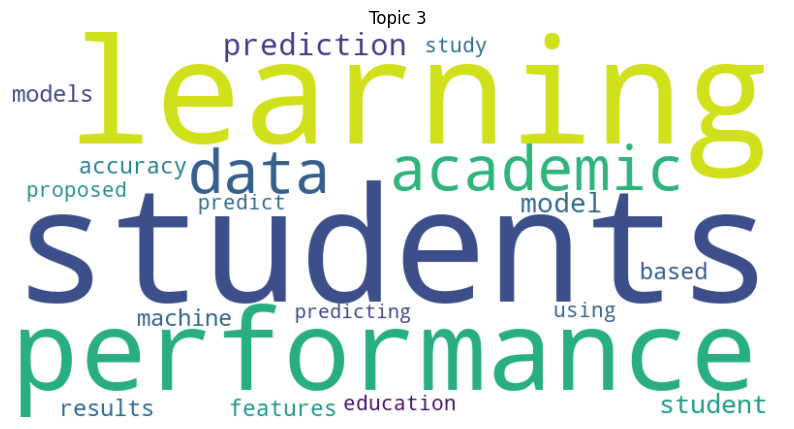

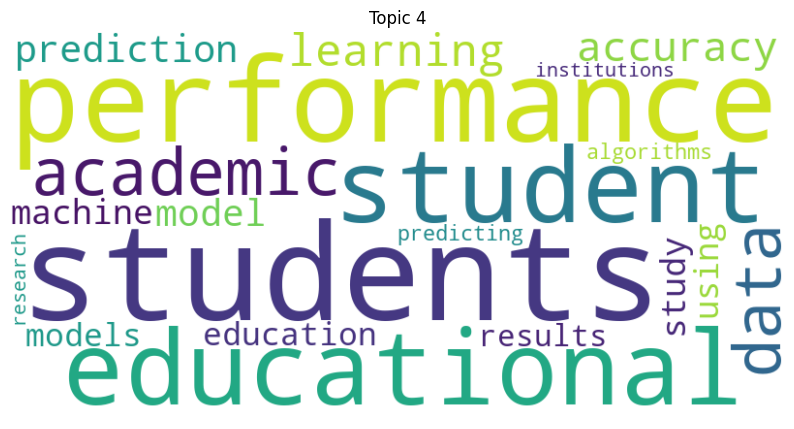

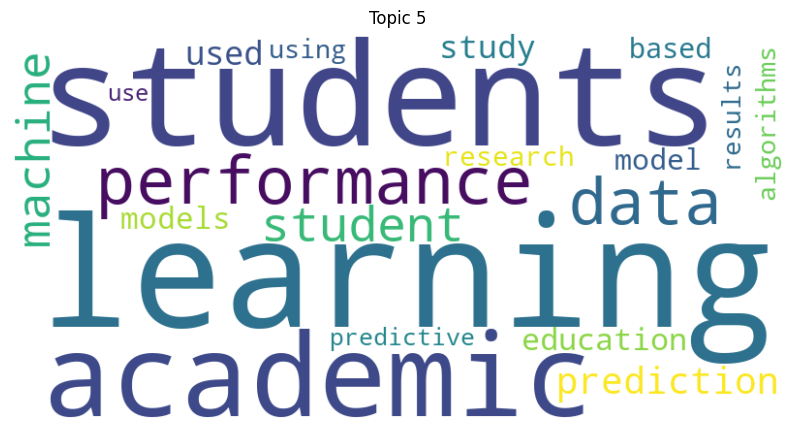

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Preprocess the 'Abstract' column: remove NaN, convert to lowercase, and strip whitespace
df['Abstract'] = df['Abstract'].dropna().str.lower().str.strip()

# Vectorization: Convert text to a document-term matrix
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
dtm = vectorizer.fit_transform(df['Abstract'])

# LDA Topic Modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Extracting and visualizing topics with word clouds
feature_names = vectorizer.get_feature_names_out()

def plot_word_cloud(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-no_top_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)
        
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {topic_idx + 1}')
        plt.show()

no_top_words = 20
plot_word_cloud(lda, feature_names, no_top_words)


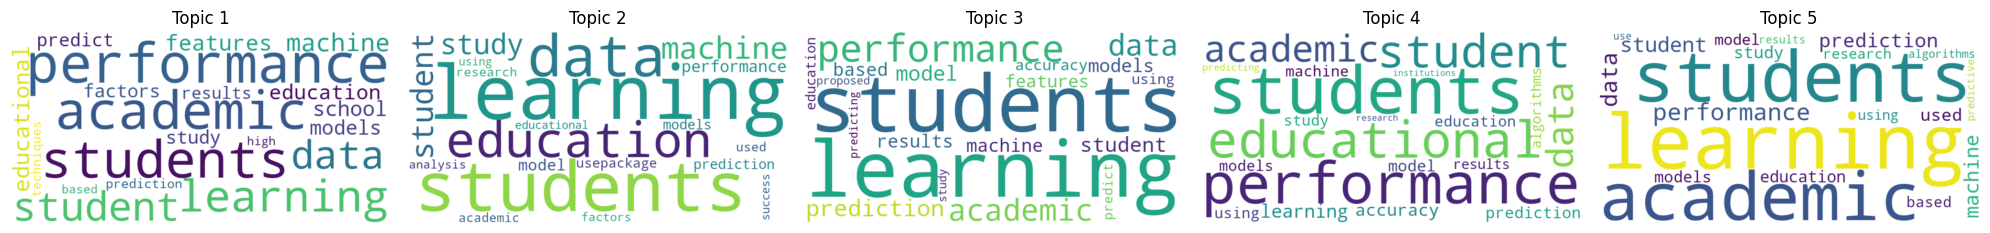

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Preprocess the 'Abstract' column: remove NaN, convert to lowercase, and strip whitespace
df['Abstract'] = df['Abstract'].dropna().str.lower().str.strip()

# Vectorization: Convert text to a document-term matrix
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
dtm = vectorizer.fit_transform(df['Abstract'])

# LDA Topic Modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Extracting topics
feature_names = vectorizer.get_feature_names_out()
no_top_words = 20

# Create a figure for the word clouds
fig, axes = plt.subplots(1, 5, figsize=(20, 8), sharex=True, sharey=True)

for topic_idx, topic in enumerate(lda.components_):
    top_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-no_top_words - 1:-1]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)
    
    ax = axes[topic_idx]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Topic {topic_idx + 1}')

plt.tight_layout()
plt.show()


In [7]:
# Descriptive statistics for Cited Reference Count
cited_reference_stats = df['Cited Reference Count'].describe()
print(cited_reference_stats)


count    285.000000
mean      45.042105
std       25.970019
min        0.000000
25%       27.000000
50%       40.000000
75%       56.000000
max      143.000000
Name: Cited Reference Count, dtype: float64


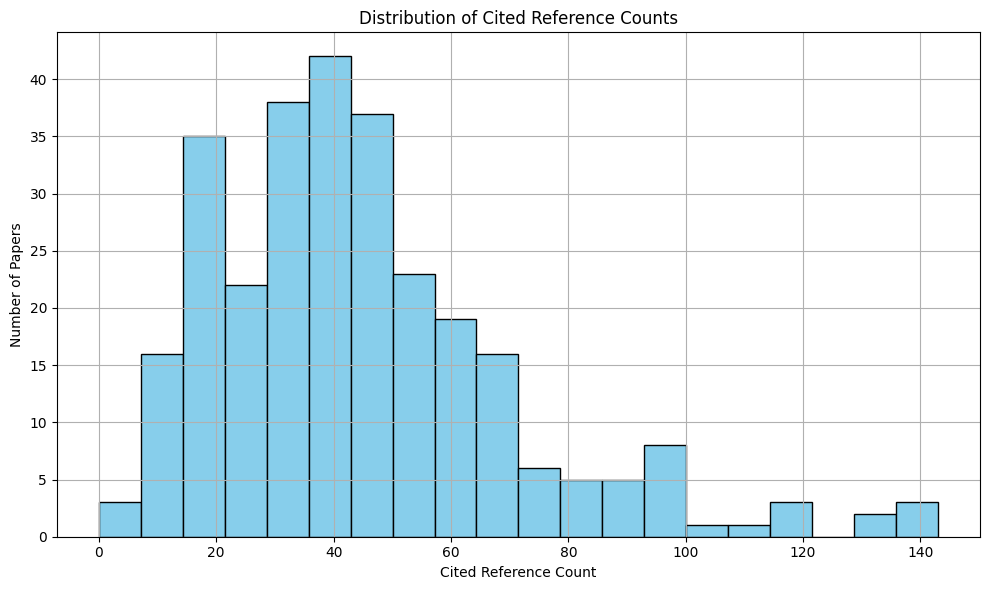

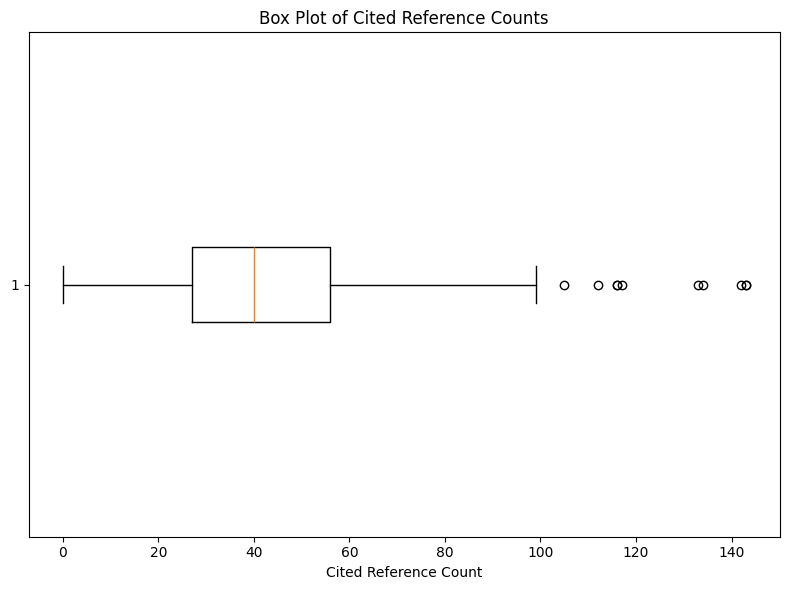

In [8]:
import matplotlib.pyplot as plt

# Histogram for Cited Reference Count
plt.figure(figsize=(10, 6))
plt.hist(df['Cited Reference Count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Cited Reference Counts')
plt.xlabel('Cited Reference Count')
plt.ylabel('Number of Papers')
plt.grid(True)
plt.tight_layout()
plt.show()

# Box plot for Cited Reference Count
plt.figure(figsize=(8, 6))
plt.boxplot(df['Cited Reference Count'].dropna(), vert=False)
plt.title('Box Plot of Cited Reference Counts')
plt.xlabel('Cited Reference Count')
plt.tight_layout()
plt.show()


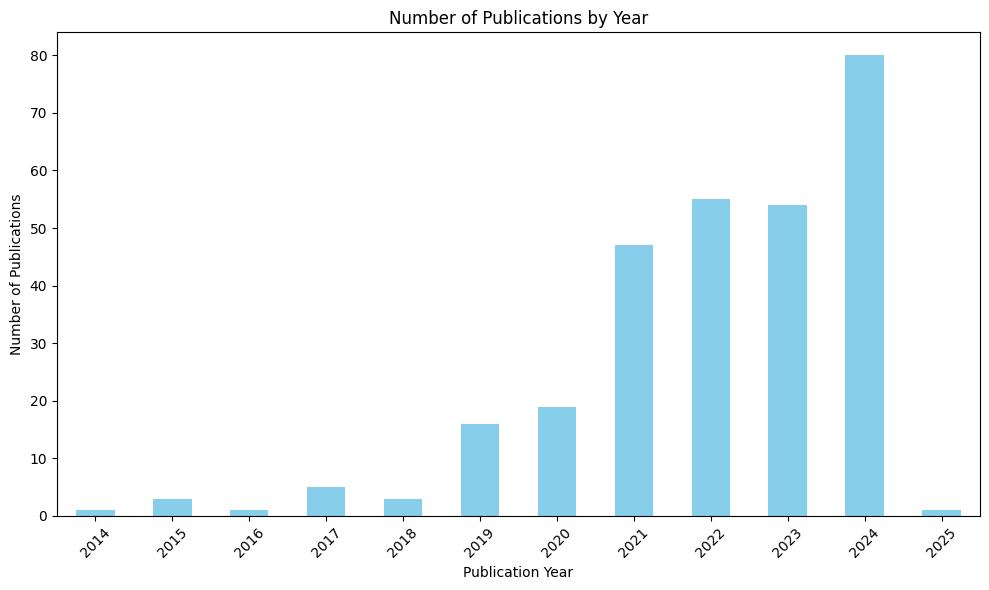

In [9]:
import matplotlib.pyplot as plt

# Count publications by year
publications_per_year = df['Publication Year'].value_counts().sort_index()

# Plotting the number of publications by year
plt.figure(figsize=(10, 6))
publications_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Publications by Year')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


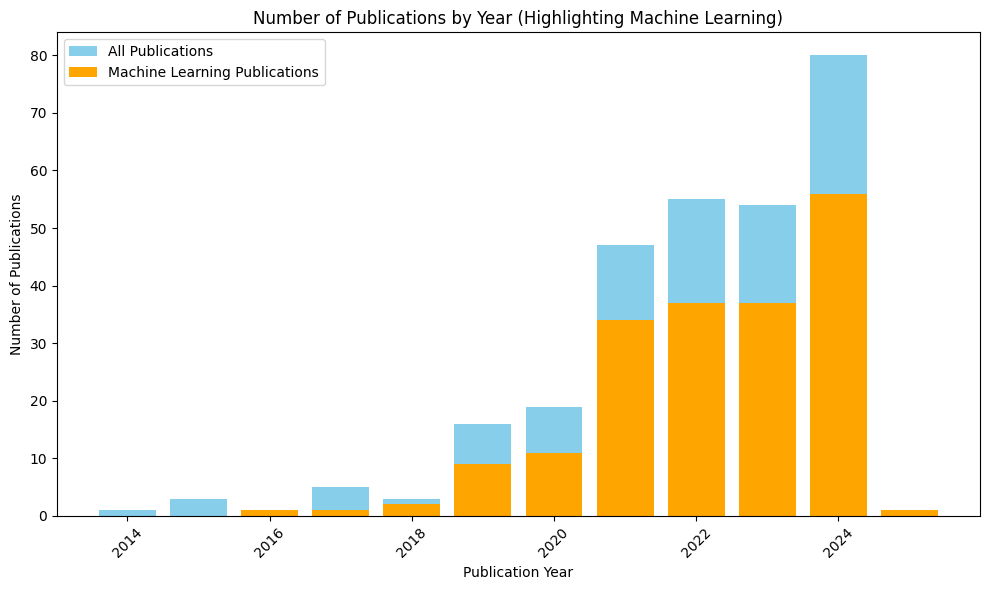

In [10]:
# Filter rows with 'machine learning' in 'Author Keywords'
df['Author Keywords'] = df['Author Keywords'].fillna('').str.lower()
ml_publications_per_year = df[df['Author Keywords'].str.contains('machine learning')]['Publication Year'].value_counts().sort_index()

# Plotting the advanced bar chart
plt.figure(figsize=(10, 6))

# Bar chart for all publications
plt.bar(publications_per_year.index, publications_per_year.values, color='skyblue', label='All Publications')

# Bar chart for publications with 'machine learning' keyword
plt.bar(ml_publications_per_year.index, ml_publications_per_year.values, color='orange', label='Machine Learning Publications')

plt.title('Number of Publications by Year (Highlighting Machine Learning)')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
